# Support Vector Classifier

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Creating the synethetic data points

from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples = 2000, n_features = 2, n_classes=2, n_clusters_per_class=2,n_redundant = 0)
X

array([[-0.96599246, -1.0042078 ],
       [ 1.05129687, -1.00606104],
       [-0.75793744, -1.39485141],
       ...,
       [-2.68178278,  2.08711615],
       [-1.15855014,  1.51535369],
       [ 0.52654933, -0.50060771]])

In [4]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
pd.DataFrame(X)[0]

0      -0.965992
1       1.051297
2      -0.757937
3       0.700341
4      -0.650816
          ...   
1995    1.595695
1996    0.982430
1997   -2.681783
1998   -1.158550
1999    0.526549
Name: 0, Length: 2000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

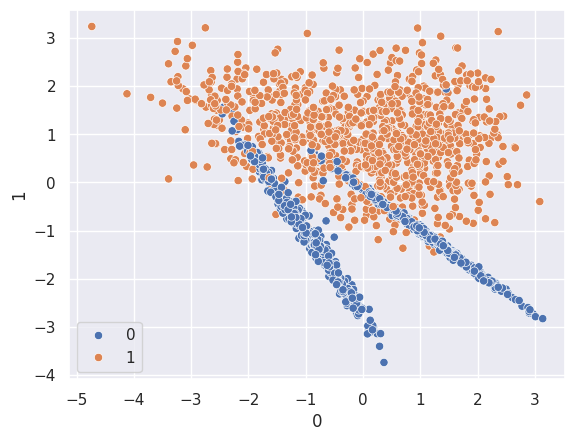

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
svc_x_train,svc_x_test,svc_y_train,svc_y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [8]:
print(svc_x_train.shape)
print(svc_y_train.shape)
print(svc_x_test.shape)
print(svc_y_test.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


In [9]:
# Model Building

from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc

SVC(kernel='linear')

In [10]:
# Fit the model

svc.fit(svc_x_train, svc_y_train)

SVC(kernel='linear')

In [11]:
svc.coef_

array([[0.86922647, 2.5432872 ]])

In [12]:
# Prediction

y_pred = svc.predict(svc_x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_pred,svc_y_test))
print(confusion_matrix(y_pred,svc_y_test))
print(accuracy_score(y_pred,svc_y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       215
           1       0.88      0.93      0.90       185

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

[[191  24]
 [ 13 172]]
0.9075


In [14]:
# Hyperparameter Tuning with Support Vector Classifier

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear']}

In [15]:
svc_grid = GridSearchCV(SVC(),param_grid=param_grid, refit=True, cv=5, verbose=3)
svc_grid.fit(svc_x_train,svc_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.903 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.922 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.922 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.903 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.909 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.922 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [16]:
svc_grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [17]:
#Prediction

svcgrid_y_pred = svc_grid.predict(svc_x_test)
print(classification_report(svcgrid_y_pred,svc_y_test))
print(confusion_matrix(svcgrid_y_pred,svc_y_test))
print(accuracy_score(svcgrid_y_pred,svc_y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       216
           1       0.87      0.93      0.90       184

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400

[[191  25]
 [ 13 171]]
0.905


# Support Vector Regressor

In [18]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)
X

array([[-0.31038993,  0.08408294],
       [ 1.18943823,  0.55543851],
       [ 0.39936945,  0.62476702],
       ...,
       [ 0.45778558, -0.36909969],
       [-1.25440639,  0.26808053],
       [-1.84396734, -0.10572994]])

In [19]:
y.shape

(1000,)

In [20]:
pd.DataFrame(X)[0]

0     -0.310390
1      1.189438
2      0.399369
3      1.159636
4     -0.432706
         ...   
995    2.947772
996    0.765313
997    0.457786
998   -1.254406
999   -1.843967
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

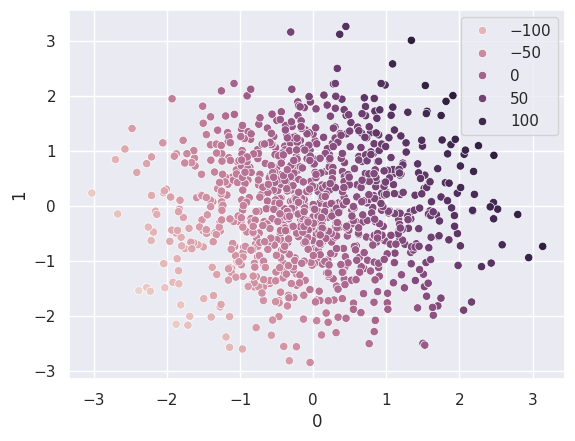

In [21]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

In [22]:
svr_x_train,svr_x_test,svr_y_train,svr_y_test = train_test_split(X,y,test_size = 0.25,random_state = 29)

In [23]:
print(svr_x_train.shape)
print(svr_x_test.shape)
print(svr_y_train.shape)
print(svr_y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [24]:
# Model Building

from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr

SVR(kernel='linear')

In [25]:
svr.fit(svr_x_train,svr_y_train)

SVR(kernel='linear')

In [26]:
print(svr.coef_)

[[41.46705438 19.85813799]]


In [27]:
# Prediction

svr_y_pred = svc_grid.predict(svr_x_test)
svr_y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1])

In [28]:
from sklearn.metrics import r2_score

In [29]:
print(r2_score(svr_y_test,svr_y_pred))

0.00874863485932742


In [30]:
# Hyperparameter Tuning ith SVR

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]}

svr_grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [31]:
svr_grid.fit(svr_x_train,svr_y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [32]:
svr_grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [33]:
# Prediction

svr_y_predcv = svr_grid.predict(svr_x_test)
print(r2_score(svr_y_test,svr_y_predcv))

0.9952836047310992
